# Итоговая работа по спецкурсу

## Взял приведенные данные из первой курсовой про оценку тональности комментариев...


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn import metrics
import time
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

%matplotlib inline

Взяты приведенные тексты:

In [2]:
posi = pd.read_csv('cleaned_positiv_text.csv',sep=';')
nega = pd.read_csv('cleaned_negative_text.csv',sep=';')
nega['label'] = 1
posi['label'] = 0

Они выглядат так 

In [3]:
posi.head()

,tweet,label
0,оть я и школотый но поверь у мы то же самый об...,0
1,да всетаки он немного поожий на он но мой маль...,0
2,ну ты идиотка я испугаться за ты,0
3,кто то в угол сидеть и погибать от голод а мы ...,0
4,вот что значит страшилка но блинпосмотреть вес...,0


In [4]:
nega.head()

,tweet,label
0,на работа быть полный пиддес и так каждый закр...,1
1,коллега сидеть рубиться в а я изз долбать винд...,1
2,как говорят обещаной три год ждать,1
3,желать оронуть полёт и удачный посадкия быть о...,1
4,обновить за какимтый леший теперь не работать ...,1


In [5]:
train = posi[:int(0.75 * len(posi) // 1)].append(nega[:int(0.75 * len(nega) // 1)], ignore_index=True)
test = posi[int(0.75 * len(posi) // 1):].append(nega[int(0.75 * len(nega) // 1):], ignore_index=True)
combi = train.append(test, ignore_index=True)

Выведем самые популярные слова в комментариях

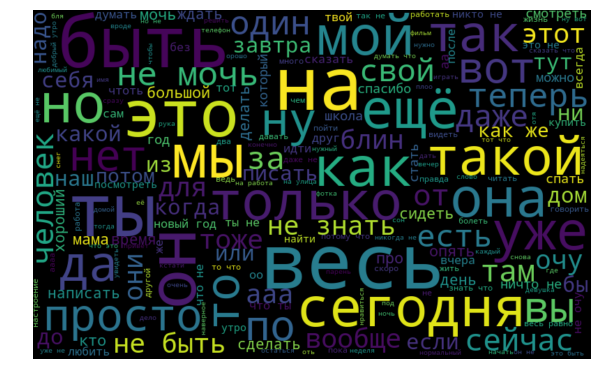

In [6]:
words = ' '.join([text for text in combi['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Теперь рассмотрим гистограмму по длине комментария

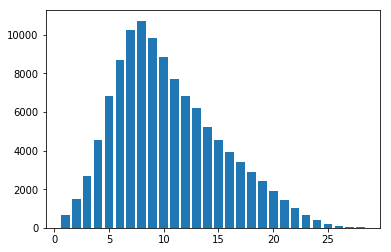

In [7]:
num = []
for item in combi['tweet']:
    num.append(len(str(item).split()))
elem = range(min(num), max(num), 1)
edges = list( elem ) + [max(num)]
hh = np.histogram( num , edges )
plt.bar(elem, hh[0]);

Построим классификатор на основе логистической регрессии

In [8]:

def linear_log_regression(a):
    start_time = time.time()
    bow_vectorizer = CountVectorizer(max_df=0.90, max_features=a)
    bow = bow_vectorizer.fit_transform(combi['tweet'])
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, combi['label'], random_state=42, test_size=0.25)
    lreg = LogisticRegression(solver='lbfgs', max_iter = 500)
    lreg.fit(xtrain_bow, ytrain)
    prediction = lreg.predict_proba(xvalid_bow)
    prediction_int = prediction[:,1] >= 0.3
    prediction_int = prediction_int.astype(np.int)
    print('Размерность вектора =', a,' выполнено за %s seconds' % (time.time() - start_time))
    print( metrics.classification_report( yvalid, prediction_int ) )

linear_log_regression(50)
linear_log_regression(100)
linear_log_regressionn(500)
linear_log_regression(1000)
linear_log_regression(5000)
linear_log_regression(10000)

Размерность вектора = 50  выполнено за 2.1133501529693604 seconds
              precision    recall  f1-score   support

           0       0.70      0.04      0.07     14380
           1       0.50      0.98      0.66     13973

   micro avg       0.50      0.50      0.50     28353
   macro avg       0.60      0.51      0.36     28353
weighted avg       0.60      0.50      0.36     28353

Размерность вектора = 100  выполнено за 2.280428409576416 seconds
              precision    recall  f1-score   support

           0       0.77      0.10      0.17     14380
           1       0.51      0.97      0.67     13973

   micro avg       0.53      0.53      0.53     28353
   macro avg       0.64      0.53      0.42     28353
weighted avg       0.64      0.53      0.42     28353

Размерность вектора = 500  выполнено за 2.5928080081939697 seconds
              precision    recall  f1-score   support

           0       0.80      0.27      0.40     14380
           1       0.55      0.93     

Итого с увеличением размерности растет точность, а время незначительно

Теперь построим нейронную сеть для бинарной классификации с функцией потерь - кросс-энтропия

In [9]:

def neural_net_class(a, b, c, d):
    start_time = time.time()
    bow_vectorizer = CountVectorizer(max_df=0.90, max_features=a)
    bow = bow_vectorizer.fit_transform(combi['tweet'])
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, combi['label'], random_state=42, test_size=0.25)

    net = MLPClassifier(hidden_layer_sizes=b, activation=c, solver=d)
    net.fit(xtrain_bow, ytrain)
    accuracy = net.score(xvalid_bow, yvalid)
    print('Размерность вектора:', a,'кол-во слоев:', b, 'с функцией активации', c,'и оптимизатором', d , 'выполнено за %s sec' % (time.time() - start_time))
    print('Точность', accuracy)

In [10]:
neural_net_class(50, 50, 'relu', 'adam')

Размерность вектора: 50 кол-во слоев: 50 с функцией активации relu и оптимизатором adam выполнено за 83.84108138084412 sec
Точность 0.5938348675625155


In [11]:
neural_net_class(1000, 50, 'relu', 'adam')

Размерность вектора: 1000 кол-во слоев: 50 с функцией активации relu и оптимизатором adam выполнено за 181.85584449768066 sec
Точность 0.6577787183014143


In [12]:
neural_net_class(50, 100, 'relu', 'adam')

Размерность вектора: 50 кол-во слоев: 100 с функцией активации relu и оптимизатором adam выполнено за 135.86707258224487 sec
Точность 0.5910132966529115


In [13]:
neural_net_class(1000, 100, 'identity', 'adam')

Размерность вектора: 1000 кол-во слоев: 100 с функцией активации identity и оптимизатором adam выполнено за 77.43438792228699 sec
Точность 0.6880400663069164


In [14]:
neural_net_class(1000, 100, 'tanh', 'adam')

Размерность вектора: 1000 кол-во слоев: 100 с функцией активации tanh и оптимизатором adam выполнено за 294.0546147823334 sec
Точность 0.6558741579374316


In [15]:
neural_net_class(1000, 100, 'relu', 'sgd')

Размерность вектора: 1000 кол-во слоев: 100 с функцией активации relu и оптимизатором sgd выполнено за 244.7181794643402 sec
Точность 0.6970338235812789


Для бинарной классификации известно, что использование функции потерь MSE плохо из-за того, что MSE' во многих чаще зануляется. Но проверим это

In [25]:
def neural_net_class_1(a, b, c, d):
    start_time = time.time()
    bow_vectorizer = CountVectorizer(max_df=0.90, max_features=a)
    bow = bow_vectorizer.fit_transform(combi['tweet'])
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, combi['label'], random_state=42, test_size=0.25)

    net = MLPRegressor(hidden_layer_sizes=b, activation=c, solver=d)
    net.fit(xtrain_bow, ytrain)
    accuracy = net.score(xvalid_bow, yvalid)
    print('Размерность вектора:', a,'кол-во слоев:', b, 'с функцией активации', c,'и оптимизатором', d , 'выполнено за %s sec' % (time.time() - start_time))
    print('Точность', accuracy)

In [26]:
neural_net_class_1(1000, 100, 'relu', 'sgd')

Размерность вектора: 1000 кол-во слоев: 100 с функцией активации relu и оптимизатором sgd выполнено за 115.84732985496521 sec
Точность 0.18216915845034073


Точность..